# Nonlinear Regression Models

Sometimes, we do not really care about a direct, linear statistical relationship between our data and a model we want to use for estimation.  Sometimes, we just want the model, and the data might have gone through a nonlinear function in order to be represented in the response (output).

In these cases, we'll want to use a nonlinear regression model.

There are a few different nonlinear regression algorithms, which in general fall into supervised learning:

- Support Vector Machine Regression
- Kernel Ridge Regression
- Decision Trees
- AdaBoost
- Random Forest of Decision Trees
- Neural networks (multilayer perceptrons)  (note: this usually requires a lot of data)

Let's try these on `../datasets_as/fat.csv` or `../datasets_ml/building_energy_efficiency.csv`:

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices

%matplotlib inline

In [2]:
df_fat = pd.read_csv("../datasets_as/fat.csv")
df_fat.head()

,ID,body_fat_percent,triceps_skinfold_thickness_mm,midarm_circumference_cm,thigh_circumference_cm
0,0,11.9,19.5,29.1,43.1
1,1,22.8,24.7,28.2,49.8
2,2,18.7,30.7,37.0,51.9
3,3,20.1,29.8,31.1,54.3
4,4,12.9,19.1,30.9,42.2


In [3]:
df_fat.describe()

,ID,body_fat_percent,triceps_skinfold_thickness_mm,midarm_circumference_cm,thigh_circumference_cm
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,9.50000,20.195000,25.305000,27.620000,51.170000
std,5.91608,5.106186,5.023259,3.647147,5.234612
min,0.00000,11.700000,14.600000,21.300000,42.200000
25%,4.75000,17.050000,21.500000,24.750000,47.775000
50%,9.50000,21.200000,25.550000,27.900000,52.000000
75%,14.25000,24.275000,29.900000,30.025000,54.625000
max,19.00000,27.200000,31.400000,37.000000,58.600000


In [4]:
df_fat.drop(columns="ID", inplace=True)
df_fat.head()

,body_fat_percent,triceps_skinfold_thickness_mm,midarm_circumference_cm,thigh_circumference_cm
0,11.9,19.5,29.1,43.1
1,22.8,24.7,28.2,49.8
2,18.7,30.7,37.0,51.9
3,20.1,29.8,31.1,54.3
4,12.9,19.1,30.9,42.2


In [27]:
bodyfat_y, bodyfat_X = dmatrices(
    'body_fat_percent ~ triceps_skinfold_thickness_mm + thigh_circumference_cm',
    data=df_fat,
    return_type='dataframe')

In [28]:
from sklearn import preprocessing as sklp

In [29]:
bodyfat_scaler = sklp.StandardScaler()
bodyfat_X_scaled = bodyfat_scaler.fit_transform(bodyfat_X)

In [30]:
bodyfat_X.head()

,Intercept,triceps_skinfold_thickness_mm,thigh_circumference_cm
0,1.0,19.5,43.1
1,1.0,24.7,49.8
2,1.0,30.7,51.9
3,1.0,29.8,54.3
4,1.0,19.1,42.2


In [31]:
print(bodyfat_X_scaled)

[[ 0.         -1.18564547 -1.58171151]
 [ 0.         -0.12356856 -0.26851856]
 [ 0.          1.10190479  0.14307923]
 [ 0.          0.91808379  0.61347671]
 [ 0.         -1.26734369 -1.75811056]
 [ 0.          0.06025244  0.53507713]
 [ 0.          1.24487668  1.43667229]
 [ 0.          0.53001722  0.18227902]
 [ 0.         -0.65460701 -0.24891866]
 [ 0.          0.03982788  0.45667755]
 [ 0.          1.18360301  1.06427429]
 [ 0.          1.04063112  1.08387418]
 [ 0.         -1.34904191 -0.91531509]
 [ 0.         -1.14479636 -1.36611267]
 [ 0.         -2.1864487  -1.66011109]
 [ 0.          0.85681012  0.6330766 ]
 [ 0.          0.48916811  0.80947565]
 [ 0.          0.99978201  1.45627218]
 [ 0.         -0.53205968 -0.58211687]
 [ 0.         -0.02144578 -0.03331982]]


## Support Vector Regression

In [42]:
from sklearn import svm
bodyfat_svm = svm.SVR(kernel='linear')  # linear works better, but if linear works better, why not just do linear regression?
bodyfat_svm_results = bodyfat_svm.fit(bodyfat_X_scaled, bodyfat_y["body_fat_percent"])

In [43]:
bodyfat_svm_results.score(bodyfat_X_scaled, bodyfat_y["body_fat_percent"])

0.7617828024527631

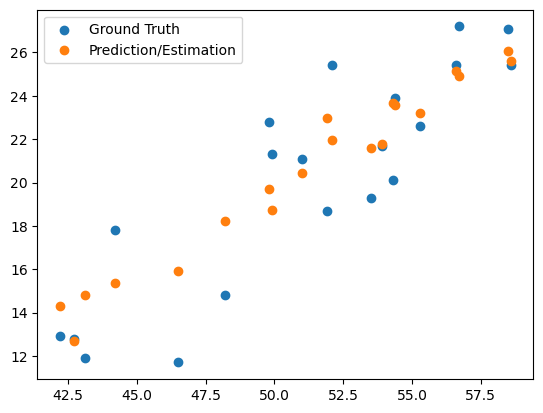

In [44]:
bodyfat_svm_pred_y = bodyfat_svm_results.predict(bodyfat_X_scaled)

plt.scatter(bodyfat_X["thigh_circumference_cm"], bodyfat_y["body_fat_percent"], label="Ground Truth")
plt.scatter(bodyfat_X["thigh_circumference_cm"], bodyfat_svm_pred_y, label="Prediction/Estimation")
plt.legend()

## Decision Tree Regression

In [55]:
from sklearn import tree as sklt
from sklearn import model_selection as sklms

X_train, X_test, y_train, y_test = sklms.train_test_split(
    bodyfat_X_scaled, bodyfat_y["body_fat_percent"], 
    test_size=0.33, random_state=42)

bodyfat_dtree = sklt.DecisionTreeRegressor()
bodyfat_dtree_results = bodyfat_dtree.fit(X_train, y_train)

In [56]:
bodyfat_dtree_results.score(X_test, y_test)

0.5793289065262663

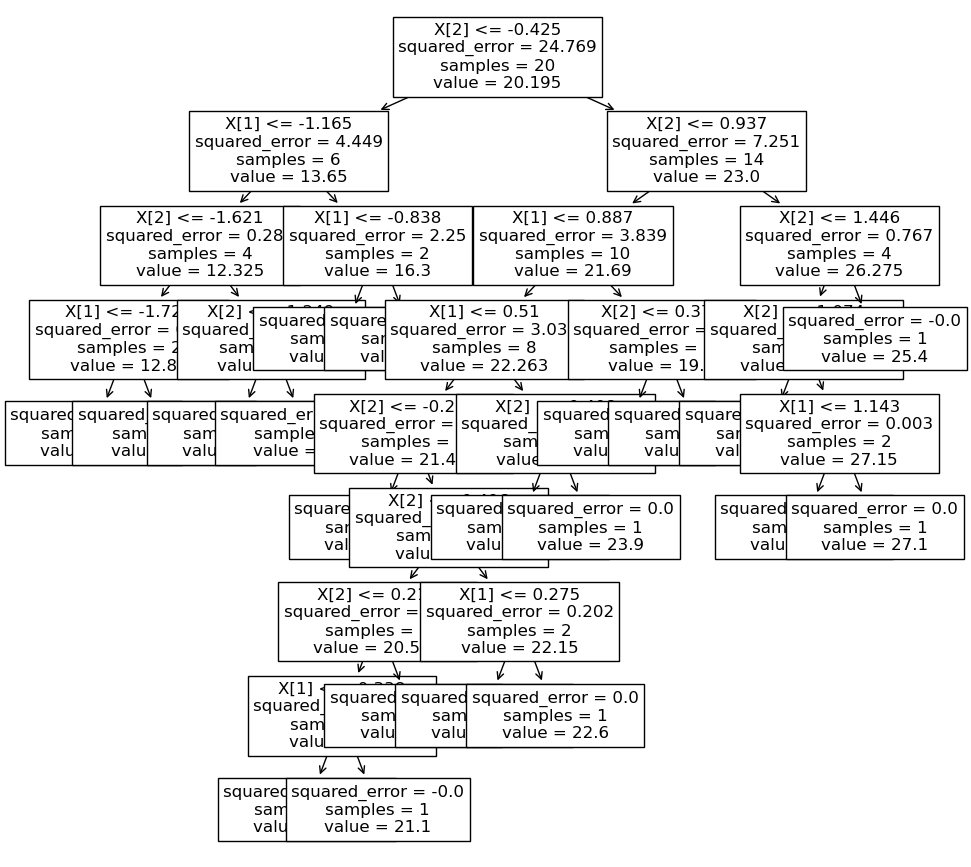

In [53]:
fig = plt.figure(figsize=(11, 11))
sklt.plot_tree(bodyfat_dtree_results, fontsize=12)
plt.show()